# Read CSV and save them into sql database

*   read csv
*   clean dataset
*   save in to databse
*   read csv and load data into table



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import pandas as pd
from itertools import groupby

Using python to partiiton dataset into two

In [ ]:
csvfile = open('/content/spotify_ds.csv', 'r').readlines()
filename = 1
for i in range(len(csvfile)):
  if i % 1001 == 0:
    open("spotify_ds-" + str(filename) + '.csv', 'w+').writelines(csvfile[i:i+1001])
    filename += 1

Read file

In [ ]:
try:
  df = pd.read_csv('/content/spotify_ds-1.csv')
  print("Partition 1 file read")
except:
  print("An exception occurred for reading partition 1")

try:
  df2 = pd.read_csv('/content/spotify_ds-2.csv')
  print("Partition 2 file read")
except:
  print("An exception occurred for reading partition 2")

Partition 1 file read
Partition 2 file read


Clean dataset for any null values

In [ ]:
print("Cleaning partition 1:")
print("System checking any null values:", df.isnull())
print("Shape of dataset before drop:", df.shape)
df = df.dropna()
print("shape after drop:", df.shape)
print()
print("Cleaning partition 2:")
print("System checking any null values:", df2.isnull())
print("Shape of dataset before drop:", df2.shape)
df2 = df2.dropna()
print("shape after drop:", df2.shape)

Cleaning partition 1:
System checking any null values:      artist   song  duration_ms  explicit   year  popularity  danceability  \
0     False  False        False     False  False       False         False   
1     False  False        False     False  False       False         False   
2     False  False        False     False  False       False         False   
3     False  False        False     False  False       False         False   
4     False  False        False     False  False       False         False   
..      ...    ...          ...       ...    ...         ...           ...   
995   False  False        False     False  False       False         False   
996   False  False        False     False  False       False         False   
997   False  False        False     False  False       False         False   
998   False  False        False     False  False       False         False   
999   False  False        False     False  False       False         False   

     ene

Drop any duplicated value

In [ ]:
print("Dropping partition 1...")
df = df.drop_duplicates()
print("shape after drop:", df.shape)
print()
print("Dropping partition 2...")
df2 = df2.drop_duplicates()
print("shape after drop:", df2.shape)

Dropping partition 1...
shape after drop: (969, 18)

Dropping partition 2...
shape after drop: (974, 18)


To database using sqlite3

In [ ]:
import sqlite3 as sl

In [ ]:
try:
  conn = sl.connect('spotifyds.db')
  print("You are now successfully connected to spotifyds database")
except:
  print("There is an error occured...")

You are now successfully connected to spotifyds database


In [ ]:
# create sql db for partition 1
print("Now creating sql db for partition 1")
curs = conn.cursor()
print("Checking if the table already exist...")
curs.execute("DROP TABLE IF EXISTS Spotify1;")
print("Now creating table Spotify1...")
stmt1 = "CREATE TABLE Spotify1 (\
artist VARCHAR(41) NOT NULL \
,song VARCHAR(114) NOT NULL\
,duration_ms INTEGER  NOT NULL\
,explicit BOOLEAN NOT NULL\
,year INTEGER  NOT NULL\
,popularity INTEGER  NOT NULL\
,danceability NUMERIC(5,3) NOT NULL\
,energy NUMERIC(6,4) NOT NULL\
,key INTEGER  NOT NULL\
,loudness NUMERIC(7,3) NOT NULL\
,mode BIT  NOT NULL\
,speechiness NUMERIC(6,4) NOT NULL\
,acousticness NUMERIC(8,6) NOT NULL\
,instrumentalness NUMERIC(11,6) NOT NULL\
,liveness NUMERIC(6,4) NOT NULL\
,valence NUMERIC(6,4) NOT NULL\
,tempo NUMERIC(7,3) NOT NULL\
,genre VARCHAR(37) NOT NULL)"
curs.execute(stmt1)
print("Inserting values into table Spotify1...")
for row in df.itertuples():
  stmt2 = "INSERT INTO Spotify1 (artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)"
  val = (row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9], row[10], row[11],row[12], row[13],row[14], row[15], row[16], row[17], row[18])
  curs.execute(stmt2, val)
  conn.commit()
print("Table: Spotify1 successfully created")

Now creating sql db for partition 1
Checking if the table already exist...
Now creating table Spotify1...
Inserting values into table Spotify1...
Table: Spotify1 successfully created


In [ ]:
# create sql db for partition 2
print("Now creating sql db for partition 2")
curs = conn.cursor()
print("Checking if the table already exist...")
curs.execute("DROP TABLE IF EXISTS Spotify2;")
print("Now creating table Spotify2...")
stmt1 = "CREATE TABLE Spotify2 (\
artist VARCHAR(41) NOT NULL \
,song VARCHAR(114) NOT NULL\
,duration_ms INTEGER  NOT NULL\
,explicit BOOLEAN NOT NULL\
,year INTEGER  NOT NULL\
,popularity INTEGER  NOT NULL\
,danceability NUMERIC(5,3) NOT NULL\
,energy NUMERIC(6,4) NOT NULL\
,key INTEGER  NOT NULL\
,loudness NUMERIC(7,3) NOT NULL\
,mode BIT  NOT NULL\
,speechiness NUMERIC(6,4) NOT NULL\
,acousticness NUMERIC(8,6) NOT NULL\
,instrumentalness NUMERIC(11,6) NOT NULL\
,liveness NUMERIC(6,4) NOT NULL\
,valence NUMERIC(6,4) NOT NULL\
,tempo NUMERIC(7,3) NOT NULL\
,genre VARCHAR(37) NOT NULL)"
curs.execute(stmt1)
print("Inserting values into table Spotify2...")
for row in df2.itertuples():
  stmt2 = "INSERT INTO Spotify2 (artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)"
  val = (row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9], row[10], row[11],row[12], row[13],row[14], row[15], row[16], row[17], row[18])
  curs.execute(stmt2, val)
  conn.commit()
print("Table: Spotify2 successfully created")

Now creating sql db for partition 2
Checking if the table already exist...
Now creating table Spotify2...
Inserting values into table Spotify2...
Table: Spotify2 successfully created


# Explore different graphs

In [ ]:
# showing the Partition data to user
def display():
  stmt = "SELECT * FROM Spotify1;"
  curs.execute(stmt)
  result = curs.fetchall()
  print("Partition 1:", result)

  stmt2 = "SELECT * FROM Spotify2;"
  curs.execute(stmt2)
  result2 = curs.fetchall()
  print("Partition 2:", result2)

In [ ]:
# explaination function
def showExplain(stmt, stmt2, result, result2, final_result2, bool, bool1):
  print("Overview of partitions:")
  display()
  print()
  print("SQL statement for mapPartition():")
  print("Partition 1: " + stmt)
  print("Partition 2: " + stmt2)
  print()
  print("Result from Partition 1:", result)
  print("Result from Partition 2:", result2)
  print()
  if bool:
    print("Reduce function:")
    if bool1:
      print("Combining two list by list add...")
      print("Using groupby from itertools, for each key: groupby(sorted(final_result), key=lambda x: x[0])")
      print("For each key, sum up their values and divide by 2 to calculate mean: sum(v[1] for v in g)/2")
      print("Now producing the final result")
    else:
      print("Combining two list by list add...")
      print("Using groupby from itertools, for each key: groupby(sorted(final_result), key=lambda x: x[0])")
      print("For each key, sum up their values to calculate sum: sum(v[1] for v in g)")
      print("Now producing the final result")
  else:
    print("Combining two list by list add...")
  print("Final result after reduce function:", final_result2)
  print()

MapReduce for sum

In [ ]:
def sumReduce(result, result2):
  # Reduce function from partition data
  final_result = result + result2
  final_result2 = []
  # sum up the average by using group by then apeend into a new list
  for i, g in groupby(sorted(final_result), key=lambda x: x[0]):
    final_result2.append([i, sum(v[1] for v in g)])
  return final_result2

MapReduce for mean/average

In [ ]:
def meanReduce(result, result2):
  final_result = result + result2
  final_result2 = []
  for i, g in groupby(sorted(final_result), key=lambda x: x[0]):
    final_result2.append([i, sum(v[1] for v in g)/2])
  return final_result2

**Plot Graph:**

Mean loudness/energy/danceability/duration_ms/key/speechiness/acousticness/instrumentalness/liveness/valence/popularity over the years

In [ ]:
def meanGraph(cat):
  # mapPartition from partition data
  stmt = "SELECT year, AVG(" + cat + ") FROM Spotify1 GROUP BY year;"
  stmt2 = "SELECT year, AVG(" + cat + ") FROM Spotify2 GROUP BY year;"
  curs.execute(stmt)
  result = curs.fetchall()
  curs.execute(stmt2)
  result2 = curs.fetchall()
  # Reduce function from partition data
  final_result2 = meanReduce(result, result2)

  year = []
  mean = []
  for i in final_result2:
    year.append(i[0])
  for i in final_result2:
    mean.append(i[1])
  year, mean = zip(*sorted(zip(year, mean)))

  showExplain(stmt, stmt2, result, result2, final_result2, True, True)
  print("Now displaying the plot graph of your choice:", cat)
  fig, ax = plt.subplots(figsize=(20, 10))
  ax.set_xticks(range(1995, 2021, 1))
  ax.set_xlabel('Year')
  ax.set_ylabel(cat)
  ax.set_title("The mean value of " + cat + " over the years")
  ax.plot(year, mean)
  plt.grid()
  plt.show()

Please choose from following categories: (Enter a number)
  1. loudness
  2. energy
  3. danceability
  4. duration_ms
  5. key
  6. speechiness
  7. acousticness
  8. instrumentalness
  9. liveness
  10. valence
  11. popularity
2
Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1

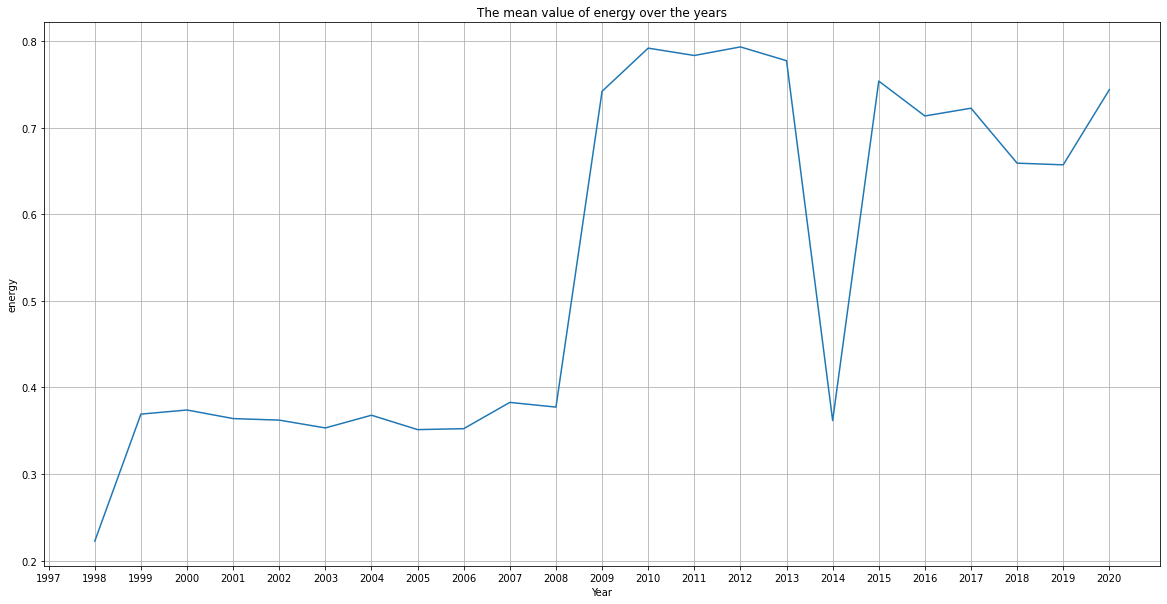

In [ ]:
def runProgram():
  meanGraphAnswer()

runProgram()

Popularity and loudness/energy/danceability/duration_ms/key/speechiness/acousticness/instrumentalness/liveness/valence

In [ ]:
# user can choose one the the categories
def catePop(cat):
  # mapPartition/ reduce from partition data
  stmt = "SELECT " + cat + ", popularity FROM Spotify1 GROUP BY " + cat + ";"
  stmt2 = "SELECT " + cat + ", popularity FROM Spotify2 GROUP BY " + cat + ";"
  curs.execute(stmt)
  result = curs.fetchall()
  curs.execute(stmt2)
  result2 = curs.fetchall()
  final_result2 = result + result2

  cat_data = []
  popularity = []
  for i in final_result2:
    cat_data.append(i[0])
  for i in final_result2:
    popularity.append(i[1])

  showExplain(stmt, stmt2, result, result2, final_result2, False, False)
  print("Now displaying the scatter graph of your choice:", cat)
  plt.figure(figsize = (20,10))
  plt.scatter(cat_data, popularity, c ="lightblue")
  plt.xlabel(cat)
  plt.ylabel("popularity")
  plt.title("Scatter graph of popularity and" + cat)
  plt.show()

Please choose from following categories: (Enter a number)
  1. loudness
  2. energy
  3. danceability
  4. duration_ms
  5. key
  6. speechiness
  7. acousticness
  8. instrumentalness
  9. liveness
  10. valence
1
Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706

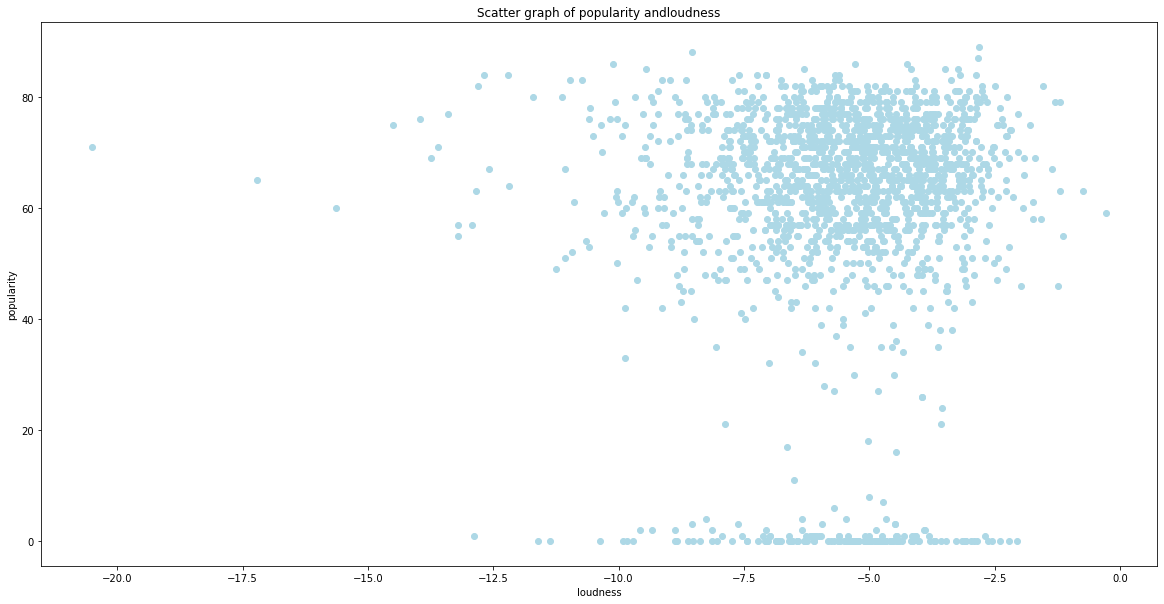

In [ ]:
def runProgram():
  comparePopGraph()

runProgram()

Top 50 artist and their songs' sum popularity

In [ ]:
def artistSumPop():
  stmt = "SELECT artist, SUM(popularity) AS SUM_Popularity FROM Spotify1 GROUP BY artist ORDER BY popularity DESC LIMIT 50;"
  stmt2 = "SELECT artist, SUM(popularity) AS SUM_Popularity FROM Spotify2 GROUP BY artist ORDER BY popularity DESC LIMIT 50;"
  curs.execute(stmt)
  result = curs.fetchall()
  curs.execute(stmt2)
  result2 = curs.fetchall()
  
  # Reduce function from partition data
  final_result2 = sumReduce(result, result2)
  
  SUM_score = []
  for i in final_result2:
    SUM_score.append(i[1])
  artist = []
  for y in final_result2:
    artist.append(y[0])
  SUM_score, artist = zip(*sorted(zip(SUM_score, artist)))

  showExplain(stmt, stmt2, result, result2, final_result2, True, False)
  print("Now displaying the horizontal bar graph: Sum Score of Popularity Based on artist...")
  plt.figure(figsize=(8,20))
  plt.barh(artist, SUM_score)
  plt.xlabel("Popularity Score")
  plt.ylabel("artist")
  plt.title("Sum Score of Popularity Based on artist")
  plt.grid()
  plt.show()

Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706, 0.888, 2, -6.959, 1, 0.0654, 0.119, 9.64e-05, 0.07, 0.714, 121.549, 'hip hop, pop, R&B'), ('Eminem', 'The Real Slim Shady', 284200, 1, 2000, 86, 0.949, 0.661, 5, -4.244, 0, 0.0572, 0.0302, 0, 0.0454, 0.76, 104.504

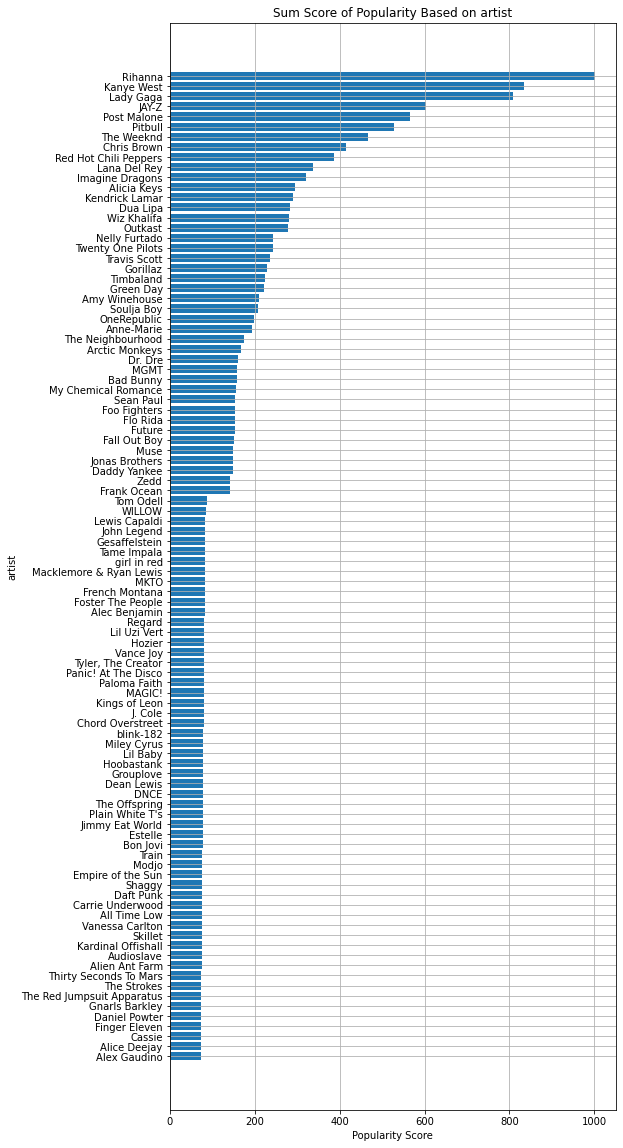

In [ ]:
artistSumPop()

Top 50 artist and their songs' average popularity

In [ ]:
def artistAvgPop():
  stmt = "SELECT artist, AVG(popularity) AS AVG_Popularity FROM Spotify1 GROUP BY artist ORDER BY popularity DESC LIMIT 50;"
  stmt2 = "SELECT artist, AVG(popularity) AS AVG_Popularity FROM Spotify2 GROUP BY artist ORDER BY popularity DESC LIMIT 50;"
  curs.execute(stmt)
  result = curs.fetchall()
  curs.execute(stmt2)
  result2 = curs.fetchall()
  # Reduce function from partition data
  final_result2 = meanReduce(result, result2)
  
  avg_score = []
  for i in final_result2:
    avg_score.append(i[1])
  artist = []
  for y in final_result2:
    artist.append(y[0])
  avg_score, artist = zip(*sorted(zip(avg_score, artist)))

  showExplain(stmt, stmt2, result, result2, final_result2, True, True)
  print("Now displaying the horizontal bar graph: Average Score of Popularity Based on artist...")
  plt.figure(figsize=(8,20))
  plt.barh(artist, avg_score)
  plt.xlabel("Popularity Score")
  plt.ylabel("artist")
  plt.title("Average Score of Popularity Based on artist")
  plt.grid()
  plt.show()


Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706, 0.888, 2, -6.959, 1, 0.0654, 0.119, 9.64e-05, 0.07, 0.714, 121.549, 'hip hop, pop, R&B'), ('Eminem', 'The Real Slim Shady', 284200, 1, 2000, 86, 0.949, 0.661, 5, -4.244, 0, 0.0572, 0.0302, 0, 0.0454, 0.76, 104.504

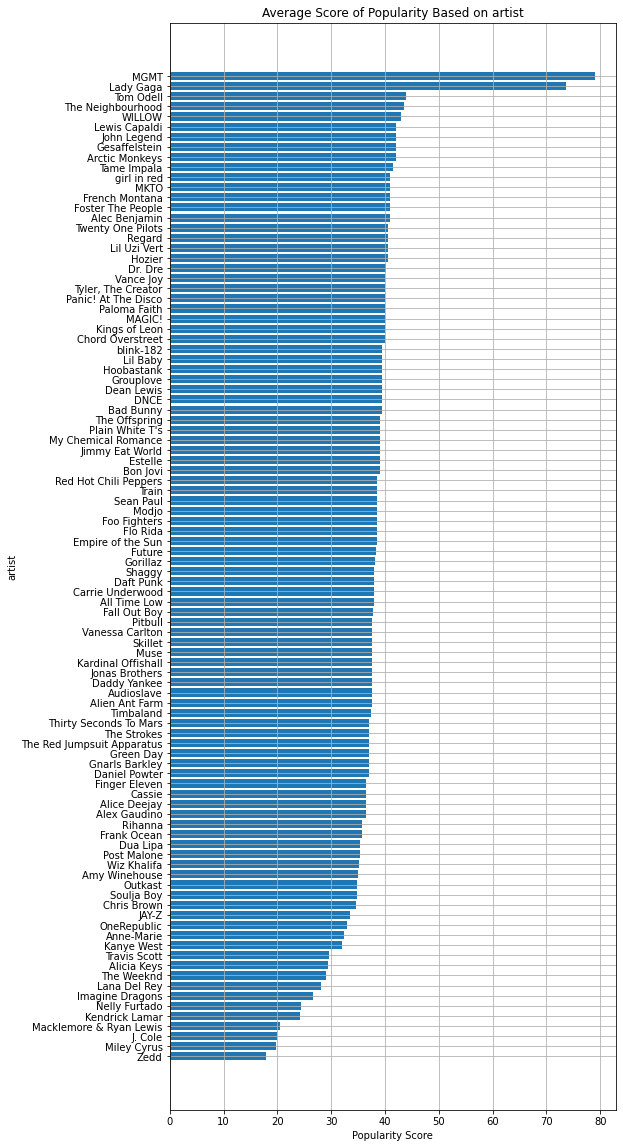

In [ ]:
artistAvgPop()

Each genre and its average popularity 

In [ ]:
def genrePop():
  stmt = "SELECT genre, AVG(popularity) AS AVG_Popularity FROM Spotify1 GROUP BY genre ORDER BY popularity DESC;"
  stmt2 = "SELECT genre, AVG(popularity) AS AVG_Popularity FROM Spotify2 GROUP BY genre ORDER BY popularity DESC;"
  curs.execute(stmt)
  result = curs.fetchall()
  curs.execute(stmt2)
  result2 = curs.fetchall()
  # Reduce function from partition data
  final_result2 = meanReduce(result, result2)
  
  avg_score = []
  for i in final_result2:
    avg_score.append(i[1])
  genre = []
  for y in final_result2:
    genre.append(y[0])
  avg_score, genre = zip(*sorted(zip(avg_score, genre)))
  
  showExplain(stmt, stmt2, result, result2, final_result2, True, True)
  print("Now displaying the horizontal bar graph: Average Score of Popularity Based on Genre...")
  plt.figure(figsize=(8,16))
  plt.barh(genre, avg_score)
  plt.xlabel("Popularity Score")
  plt.ylabel("Genre")
  plt.title("Average Score of Popularity Based on Genre")
  plt.grid()
  plt.show()

Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706, 0.888, 2, -6.959, 1, 0.0654, 0.119, 9.64e-05, 0.07, 0.714, 121.549, 'hip hop, pop, R&B'), ('Eminem', 'The Real Slim Shady', 284200, 1, 2000, 86, 0.949, 0.661, 5, -4.244, 0, 0.0572, 0.0302, 0, 0.0454, 0.76, 104.504

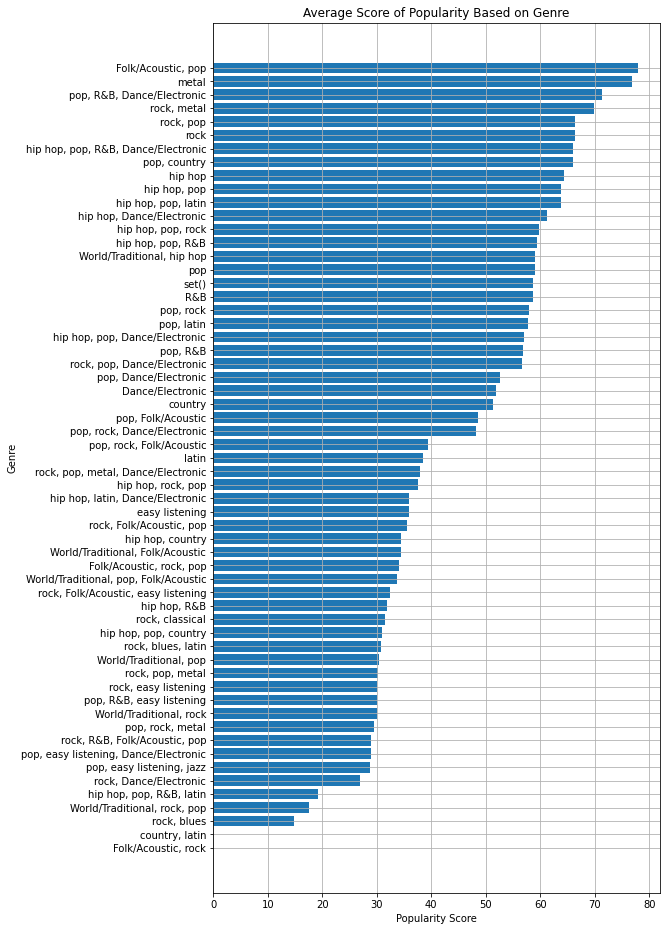

In [ ]:
genrePop()

number of song and loudness/energy/danceability/duration_ms/key/speechiness/acousticness/instrumentalness/liveness/valence

In [ ]:
# user can choose one the the categories
def popularity(cat):
    stmt = "SELECT popularity, " + cat + " FROM Spotify1 GROUP BY " + cat + ";"
    stmt2 = "SELECT popularity, " + cat + " FROM Spotify2 GROUP BY " + cat + ";"
    curs.execute(stmt)
    result = curs.fetchall()
    curs.execute(stmt)
    result = curs.fetchall()
    curs.execute(stmt2)
    result2 = curs.fetchall()
    final_result = result + result2

    # Reduce function from partition data
    final_result2 = sumReduce(result, result2)

    score = []
    for i in final_result2:
      score.append(round(i[1]))
    num_song = []
    for y in final_result2:
      num_song.append(y[0])
    
    showExplain(stmt, stmt2, result, result2, final_result2, True, False)
    print("Now displaying the bar graph of your choice:", cat)
    score, num_song = zip(*sorted(zip(score, num_song)))
    plt.hist([score, num_song])
    plt.xlabel(cat)
    plt.ylabel("Number of Song")
    plt.title(cat + " and Number of Song")
    plt.grid()
    plt.show()

Please choose from following categories: (Enter a number)
  1. genre
  2. artist
  3. loudness
  4. energy
  5. danceability
  6. duration_ms
  7. key
  8. speechiness
  9. acousticness
  10. instrumentalness
  11. liveness
  12. valence
1
Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 2

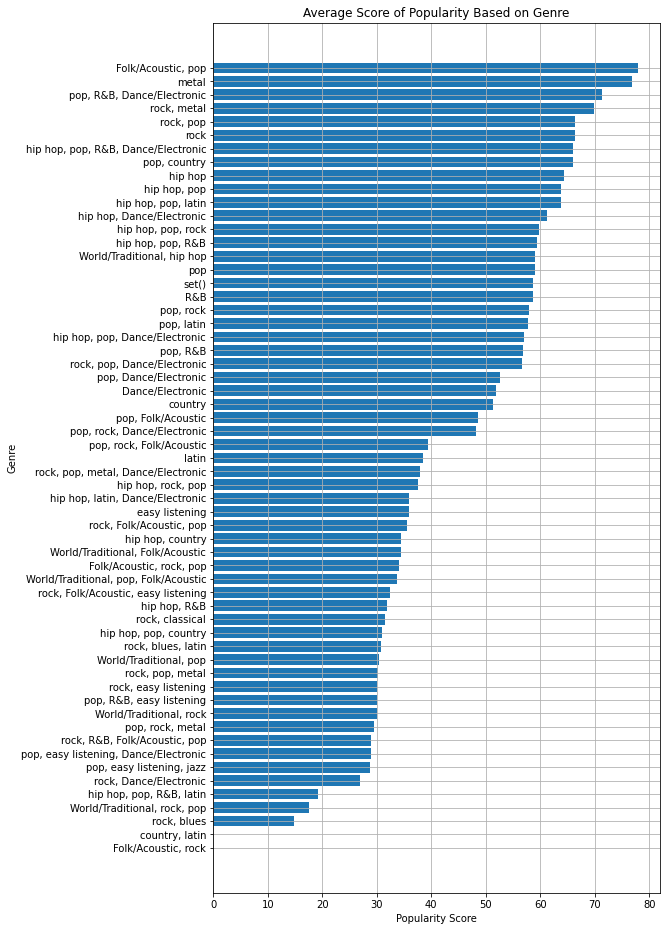

In [ ]:
      subMenuOne()
      pop_input = int(input()) 
      if pop_input == 1:
        genrePop()
      elif pop_input == 2:
        print("""Please pick one of following: (Enter a number)
        1. Sum popularity
        2. Average popularity""")
        art_input = int(input())
        if art_input == 1:
          artistSumPop()
        else:
          artistAvgPop()
      elif pop_input == 3:
        popularity("loudness")
      elif pop_input == 4:
        popularity("energy")
      elif pop_input == 5:
        popularity("danceability")
      elif pop_input == 6:
        popularity("duration_ms")
      elif pop_input == 7:
        popularity("key")
      elif pop_input == 8:
        popularity("speechiness")
      elif pop_input == 9:
        popularity("acousticness")
      elif pop_input == 10:
        popularity("instrumentalness")
      elif pop_input == 11:
        popularity("liveness")
      elif pop_input == 12:
        popularity("valence")

# Explore charts

In [ ]:
def display():
  stmt = "SELECT * FROM Spotify1;"
  curs.execute(stmt)
  result = curs.fetchall()
  print("Partition 1:", result)

  stmt2 = "SELECT * FROM Spotify2;"
  curs2.execute(stmt2)
  result2 = curs2.fetchall()
  print("Partition 2:", result2)

**Explore Top 10s:**





In [ ]:
def showExplainChart1(stmt, stmt2, result, result2, final_result2, asc):
  print("Overview of partitions:")
  display()
  print()
  print("SQL statement for mapPartition():")
  print("Partition 1: " + stmt)
  print("Partition 2: " + stmt2)
  print()
  print("Result from Partition 1:", result)
  print("Result from Partition 2:", result2)
  print()
  print("Reduce function:")
  print("Combining two list by list add...")
  if asc:
    print("Using list sort() of key to ger ascending order: list.sort(key=lambda a: a[i], reverse=False)")
  else:
    print("Using list sort() of key to ger descending order: list.sort(key=lambda a: a[i], reverse=True)")
  print("Keeping the top 10 elements only: list[:10]")

  print("Now generating the final result...")
  print("Final result after reduce function:", final_result2)
  print()

In [ ]:
curs = conn.cursor()
curs2 = conn.cursor()

Top 10 Loudness

In [ ]:
def mostLoudest():
  stmt = 'SELECT loudness, artist, song, year, popularity, genre FROM Spotify1 ORDER BY loudness ASC;'
  stmt2 = 'SELECT loudness, artist, song, year, popularity, genre FROM Spotify2 ORDER BY loudness ASC;'
  curs.execute(stmt)
  result = curs.fetchall()

  curs2.execute(stmt2)
  result2 = curs2.fetchall()

  final = result + result2
  final.sort(key = lambda x: x[0])
  final_list = final[0:10]
  return final_list

  showExplainChart1(stmt, stmt2, result, result2, final_list, True)

  if len(final_list) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("The most loudest 10 songs all the time:")
    print(tabulate(final_list, headers=["loudness", "artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

In [ ]:
mostLoudest()

[(-20.514,
  'Ed Sheeran',
  'I See Fire - From "The Hobbit - The Desolation Of Smaug"',
  2013,
  71,
  'pop'),
 (-17.217, 'Gary Jules', 'Mad World (Feat. Michael Andrews)', 2001, 65, 'pop'),
 (-15.636,
  'Katie Melua',
  'Nine Million Bicycles',
  2005,
  60,
  'pop, easy listening, jazz'),
 (-14.505,
  'Billie Eilish',
  'bury a friend',
  2019,
  75,
  'pop, Dance/Electronic'),
 (-13.964, 'Amy Winehouse', 'Back To Black', 2006, 76, 'R&B'),
 (-13.744, 'Enya', 'Only Time', 2000, 69, 'World/Traditional, Folk/Acoustic'),
 (-13.609, 'Amy Winehouse', 'Rehab', 2006, 71, 'R&B'),
 (-13.4,
  'Garrett Nash',
  "i hate u, i love u (feat. olivia o'brien)",
  2016,
  77,
  'hip hop, pop'),
 (-13.203,
  'Ying Yang Twins',
  'Wait (The Whisper Song)',
  2005,
  57,
  'hip hop, pop'),
 (-13.2,
  'Katie Melua',
  'The Closest Thing to Crazy',
  2003,
  55,
  'pop, easy listening, jazz')]

In [ ]:
def leastLoudest():
  stmt = 'SELECT loudness, artist, song, year, popularity, genre FROM Spotify1 ORDER BY loudness DESC;'
  stmt2 = 'SELECT loudness, artist, song, year, popularity, genre FROM Spotify2 ORDER BY loudness DESC;'
  curs.execute(stmt)
  result = curs.fetchall()
  curs2.execute(stmt2)
  result2 = curs2.fetchall()

  final = result + result2
  final.sort(key=lambda a: a[0], reverse=True)
  final_result = final[0:10]

  showExplainChart1(stmt, stmt2, result, result2, final_result, False)

  if len(final_result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("The most quietest 10 songs all the time:")
    print(tabulate(final_result, headers=["loudness", "artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

In [ ]:
leastLoudest()

Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706, 0.888, 2, -6.959, 1, 0.0654, 0.119, 9.64e-05, 0.07, 0.714, 121.549, 'hip hop, pop, R&B'), ('Eminem', 'The Real Slim Shady', 284200, 1, 2000, 86, 0.949, 0.661, 5, -4.244, 0, 0.0572, 0.0302, 0, 0.0454, 0.76, 104.504

Worst top 10 popular songs based on year/ all the time

In [ ]:
def worstTenPopularity(year):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify1 WHERE year=? ORDER BY popularity ASC;'
  stmt2 = 'SELECT artist, song, year, popularity, genre FROM Spotify2 WHERE year=? ORDER BY popularity ASC;'
  v = (year,)
  curs.execute(stmt, v)
  result = curs.fetchall()
  curs.execute(stmt2, v)
  result2 = curs.fetchall()

  final = result + result2
  final.sort(key=lambda a: a[3])
  final_result = final[:10]

  showExplainChart1(stmt, stmt2, result, result2, final_result, True)

  if len(final_result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Worst 10 songs in year of " + str(year) + ":")
    print(tabulate(final_result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

def worstAllPopularity():
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify1 ORDER BY popularity ASC;'
  stmt2 = 'SELECT artist, song, year, popularity, genre FROM Spotify2 ORDER BY popularity ASC;'
  curs.execute(stmt)
  result = curs.fetchall()
  curs.execute(stmt2)
  result2 = curs.fetchall()

  final = result + result2
  final.sort(key=lambda a: a[3])
  final_result = final[:10]

  showExplainChart1(stmt, stmt2, result, result2, final_result, True)

  if len(final) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Worst 10 songs all the time:")
    print(tabulate(final_result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

In [ ]:
worstTenPopularity(int(input("Please enter a year:")))

Please enter a year:2018
Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706, 0.888, 2, -6.959, 1, 0.0654, 0.119, 9.64e-05, 0.07, 0.714, 121.549, 'hip hop, pop, R&B'), ('Eminem', 'The Real Slim Shady', 284200, 1, 2000, 86, 0.949, 0.661, 5, -4.244, 0, 0.0572, 0.0302,

In [ ]:
worstAllPopularity()

Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706, 0.888, 2, -6.959, 1, 0.0654, 0.119, 9.64e-05, 0.07, 0.714, 121.549, 'hip hop, pop, R&B'), ('Eminem', 'The Real Slim Shady', 284200, 1, 2000, 86, 0.949, 0.661, 5, -4.244, 0, 0.0572, 0.0302, 0, 0.0454, 0.76, 104.504

Top 10 popular songs based on year/ all the time

In [ ]:
def topTenPopularity(year):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify1 WHERE year=? ORDER BY popularity DESC;'
  stmt2 = 'SELECT artist, song, year, popularity, genre FROM Spotify2 WHERE year=? ORDER BY popularity DESC;'
  v = (year,)
  curs.execute(stmt, v)
  result = curs.fetchall()
  curs.execute(stmt2, v)
  result2 = curs.fetchall()

  final = result + result2
  final.sort(key=lambda a: a[3], reverse=True)
  final_result = final[:10]

  showExplainChart1(stmt, stmt2, result, result2, final_result, False)

  if len(final_result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Top 10 songs in year of " + str(year) + ":")
    print(tabulate(final_result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

def topAllPopularity():
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify1 ORDER BY popularity DESC;'
  stmt2 = 'SELECT artist, song, year, popularity, genre FROM Spotify2 ORDER BY popularity DESC;'
  curs.execute(stmt)
  result = curs.fetchall()
  curs.execute(stmt2)
  result2 = curs.fetchall()

  final = result + result2
  final.sort(key=lambda a: a[3], reverse=True)
  final_result = final[:10]

  showExplainChart1(stmt, stmt2, result, result2, final_result, False)

  if len(final_result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Top 10 songs all the time:")
    print(tabulate(final_result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

In [ ]:
topTenPopularity(int(input("Please enter a year:")))

Please enter a year:2010
Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706, 0.888, 2, -6.959, 1, 0.0654, 0.119, 9.64e-05, 0.07, 0.714, 121.549, 'hip hop, pop, R&B'), ('Eminem', 'The Real Slim Shady', 284200, 1, 2000, 86, 0.949, 0.661, 5, -4.244, 0, 0.0572, 0.0302,

In [ ]:
topAllPopularity()

Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706, 0.888, 2, -6.959, 1, 0.0654, 0.119, 9.64e-05, 0.07, 0.714, 121.549, 'hip hop, pop, R&B'), ('Eminem', 'The Real Slim Shady', 284200, 1, 2000, 86, 0.949, 0.661, 5, -4.244, 0, 0.0572, 0.0302, 0, 0.0454, 0.76, 104.504

Search to show charts 

In [ ]:
def showExplainChart2(stmt, stmt2, result, result2, final_result2, asc):
  print("Overview of partitions:")
  display()
  print()
  print("SQL statement for mapPartition():")
  print("Partition 1: " + stmt)
  print("Partition 2: " + stmt2)
  print()
  print("Result from Partition 1:", result)
  print("Result from Partition 2:", result2)
  print()
  print("Reduce function:")
  print("Combining two list by list add...")
  if asc:
    print("Using list sort() of key to ger ascending order: list.sort(key=lambda a: a[i], reverse=False)")
  else:
    print("Using list sort() of key to ger descending order: list.sort(key=lambda a: a[i], reverse=True)")

  print("Now generating the final result...")
  print("Final result after reduce function:", final_result2)
  print()

Explore by popularity:

In [ ]:
def exploreBypopularity(popularity):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify1 WHERE popularity=?;'
  stmt2 = 'SELECT artist, song, year, popularity, genre FROM Spotify2 WHERE popularity=?;'
  v = (popularity,)
  curs.execute(stmt, v)
  result = curs.fetchall()
  curs.execute(stmt2, v)
  result2 = curs.fetchall()

  final_result = result + result2
  final_result.sort(key=lambda a: a[0])

  showExplainChart2(stmt, stmt2, result, result2, final_result, True)

  if len(final_result) == 0:
    print("Sorry, based on your search, there is no song at the score of " + str(popularity) + ". Please try an another score.")
  else:
    print("Below is the song info at popularity score of " + str(popularity) + ": ")
    print(tabulate(final_result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

In [ ]:
exploreBypopularity(int(input("Please enter a score (0-100):")))

Please enter a score (0-100):80
Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706, 0.888, 2, -6.959, 1, 0.0654, 0.119, 9.64e-05, 0.07, 0.714, 121.549, 'hip hop, pop, R&B'), ('Eminem', 'The Real Slim Shady', 284200, 1, 2000, 86, 0.949, 0.661, 5, -4.244, 0, 0.0572, 

Explore by artist name:

In [ ]:
def exploreByArtistName(artist):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify1 WHERE artist LIKE ? ORDER BY popularity DESC;'
  stmt2 = 'SELECT artist, song, year, popularity, genre FROM Spotify2 WHERE artist LIKE ? ORDER BY popularity DESC;'
  v = ("%{}%".format(artist),)
  curs.execute(stmt, v)
  result = curs.fetchall()
  curs.execute(stmt2, v)
  result2 = curs.fetchall()

  final_result = result + result2
  final_result.sort(key=lambda a: a[3], reverse=True)

  showExplainChart2(stmt, stmt2, result, result2, final_result, False)

  if len(final_result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Below is the song info by artist(s): " + artist + ", ranked by popularity:")
    print(tabulate(final_result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

In [ ]:
exploreByArtistName(input("Please enter an artist name:"))

Please enter an artist name:na
Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706, 0.888, 2, -6.959, 1, 0.0654, 0.119, 9.64e-05, 0.07, 0.714, 121.549, 'hip hop, pop, R&B'), ('Eminem', 'The Real Slim Shady', 284200, 1, 2000, 86, 0.949, 0.661, 5, -4.244, 0, 0.0572, 0

Explore by song name:

In [ ]:
def exploreBySongName(song):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify1 WHERE song LIKE ? ORDER BY popularity DESC;'
  stmt2 = 'SELECT artist, song, year, popularity, genre FROM Spotify2 WHERE song LIKE ? ORDER BY popularity DESC;'
  v = ("%{}%".format(song),)
  curs.execute(stmt, v)
  result = curs.fetchall()
  curs.execute(stmt2, v)
  result2 = curs.fetchall()

  final_result = result + result2
  final_result.sort(key=lambda a: a[3])

  showExplainChart2(stmt, stmt2, result, result2, final_result, True)
  
  if len(final_result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Below is the song info ranked by popularity related to your search of " + song + ":")
    print(tabulate(final_result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

In [ ]:
exploreBySongName(input("Please enter a song name:"))

Please enter a song name:centuries
Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706, 0.888, 2, -6.959, 1, 0.0654, 0.119, 9.64e-05, 0.07, 0.714, 121.549, 'hip hop, pop, R&B'), ('Eminem', 'The Real Slim Shady', 284200, 1, 2000, 86, 0.949, 0.661, 5, -4.244, 0, 0.057

Explore by genre:

In [ ]:
def exploreByGenre(genre):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify1 WHERE genre LIKE ? ORDER BY popularity DESC;'
  stmt2 = 'SELECT artist, song, year, popularity, genre FROM Spotify2 WHERE genre LIKE ? ORDER BY popularity DESC;'
  v = ("%{}%".format(genre),)
  curs.execute(stmt, v)
  result = curs.fetchall()
  curs.execute(stmt2, v)
  result2 = curs.fetchall()

  final_result = result + result2
  final_result.sort(key=lambda a: a[3])

  showExplainChart2(stmt, stmt2, result, result2, final_result, True)

  if len(final_result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Below is the song info ranked by popularity in genre of " + genre + ":")
    print(tabulate(final_result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

In [ ]:
exploreByGenre(input("Please enter a genre:"))

Please enter a genre:pop
Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706, 0.888, 2, -6.959, 1, 0.0654, 0.119, 9.64e-05, 0.07, 0.714, 121.549, 'hip hop, pop, R&B'), ('Eminem', 'The Real Slim Shady', 284200, 1, 2000, 86, 0.949, 0.661, 5, -4.244, 0, 0.0572, 0.0302,

Explore by year:

In [ ]:
def exploreByYear(year):
  stmt = 'SELECT artist, song, year, popularity, genre FROM Spotify1 WHERE year=? ORDER BY popularity DESC;'
  stmt2 = 'SELECT artist, song, year, popularity, genre FROM Spotify2 WHERE year=? ORDER BY popularity DESC;'
  v = (year,)
  curs.execute(stmt, v)
  result = curs.fetchall()
  curs.execute(stmt2, v)
  result2 = curs.fetchall()

  final_result = result + result2
  final_result.sort(key=lambda a: a[3], reverse=True)

  showExplainChart2(stmt, stmt2, result, result2, final_result, False)

  if len(final_result) == 0:
    print("Sorry, based on your search, we cannot find anything in out system.")
  else:
    print("Below is the song info ranked by popularity in year of " + str(year) + ":")
    print(tabulate(final_result, headers=["artist", "song", "year", "popularity", "genre"], tablefmt='psql'))

In [ ]:
exploreByYear(int(input("Please enter a year:")))

Please enter a year:2010
Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, pop'), ('Faith Hill', 'Breathe', 250546, 0, 1999, 66, 0.529, 0.496, 7, -9.007, 1, 0.029, 0.173, 0, 0.251, 0.278, 136.859, 'pop, country'), ('Bon Jovi', "It's My Life", 224493, 0, 2000, 78, 0.551, 0.913, 0, -4.063, 0, 0.0466, 0.0263, 1.35e-05, 0.347, 0.544, 119.992, 'rock, metal'), ('*NSYNC', 'Bye Bye Bye', 200560, 0, 2000, 65, 0.614, 0.928, 8, -4.806, 0, 0.0516, 0.0408, 0.00104, 0.0845, 0.879, 172.656, 'pop'), ('Sisqo', 'Thong Song', 253733, 1, 1999, 69, 0.706, 0.888, 2, -6.959, 1, 0.0654, 0.119, 9.64e-05, 0.07, 0.714, 121.549, 'hip hop, pop, R&B'), ('Eminem', 'The Real Slim Shady', 284200, 1, 2000, 86, 0.949, 0.661, 5, -4.244, 0, 0.0572, 0.0302,

Explanation facility:

Dataset of pay-per-stream of top 10 countries partitioned to two sets:

df = sc.parallelize([0.006376230233, 0.005369407925, 0.005315441608, 0.005302025275, 0.004951504646, 0.004915123725, 0.004706053728, 0.004675516923, 0.004589603342, 0.004046496092], 2)

Reduce function of the partition-based dataset:

df_1 = df.reduce(lambda U, x: U + x, [0.006376230233, 0.005369407925, 0.005315441608, 0.005302025275, 0.004951504646], 0)

df_2 = df.reduce(lambda U, x: U + x, [0.004915123725, 0.004706053728, 0.004675516923, 0.004589603342, 0.004046496092], 0)

df_1.map(lambda r: r / 5).collect()

df_2.map(lambda r: r / 5).collect()

Then we add the two values found from each partition to find the average pay-per-stream (PPS) of countries. However, we do adjust the PPS to be $0.004 in order to account for the fact that countries with less PPS may exist to pull down the average.

Slider menu to help calculate pay-per-stream (PPS)

Note: each stream = $0.004

Explanation Facility:
map: df_1 = df.map(lambda r: r['streams']) => df_1.map(lambda r: r * .004)

In [ ]:
# Imports for JupyterLite
try:
    import piplite
    await piplite.install(['ipywidgets'])
except ImportError:
    pass

In [ ]:
import ipywidgets as widgets

In [ ]:
widgets.FloatSlider(
    value=.0,
    min=0,
    max=200000000,
    step=.004,
    description='PPS:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=0.0, continuous_update=False, description='PPS:', max=200000000.0, readout_format='.1f', ste…

# User Menu

Please choose from following categories: (Enter a number)
  1. Explore graphs
  2. Explore charts
  3. Exit
1
Let's explore different graphs based on the dataset!
  Please choose from following categories: (Enter a number)
  1. Explore Mean values of different categories over the years
  2. Explore popularity and one of categories
  3. Explore scatter plot graph of popularity and any other categories on your choice
  4. Exist to main menu
1
Please choose from following categories: (Enter a number)
  1. loudness
  2. energy
  3. danceability
  4. duration_ms
  5. key
  6. speechiness
  7. acousticness
  8. instrumentalness
  9. liveness
  10. valence
  11. popularity
3
Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 0.0437, 0.3, 1.77e-05, 0.355, 0.894, 95.053, 'pop'), ('blink-182', 'All The Small Things', 167066, 0, 1999, 79, 0.434, 0.897, 0, -4.918, 1, 0.0488, 0.0103, 0, 0.612, 0.684, 148.726, 'rock, po

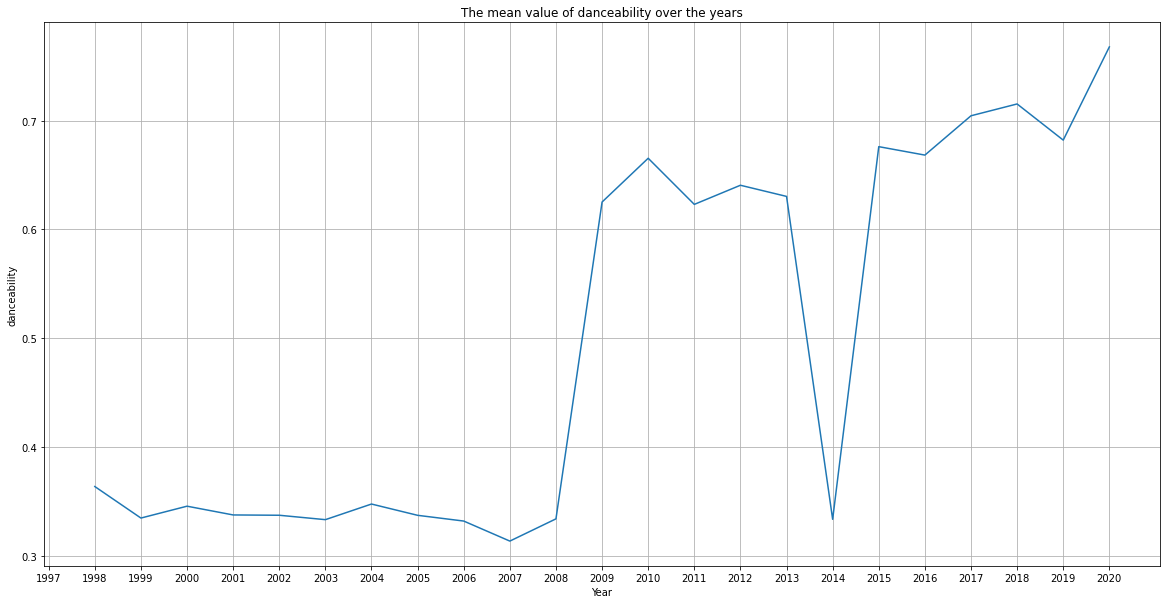

Let's explore different graphs based on the dataset!
  Please choose from following categories: (Enter a number)
  1. Explore Mean values of different categories over the years
  2. Explore popularity and one of categories
  3. Explore scatter plot graph of popularity and any other categories on your choice
  4. Exist to main menu
4
Please choose from following categories: (Enter a number)
  1. Explore graphs
  2. Explore charts
  3. Exit
2
"Let's explore different charts based on the dataset!
  Please choose from following categories: (Enter a number)
  1. Explore top 10s
  2. Search the dataset on your choice
  3. Exist to main menu
1
Let's explore top 10s! Please select from blow categories (enter a number):
    1. best 10 by year
    2. best 10 all the time
    3. worst 10 by year
    4. worst 10 all the time
    5. loudness
    6. exit to main menu
2
Overview of partitions:
Partition 1: [('Britney Spears', 'Oops!...I Did It Again', 211160, 0, 2000, 77, 0.751, 0.834, 1, -5.444, 0, 

In [ ]:
# welcome message
def mainMenu():
  print("""Please choose from following categories: (Enter a number)
  1. Explore graphs
  2. Explore charts
  3. Exit""")

def menuTwo():
  print("""Let's explore different graphs based on the dataset!
  Please choose from following categories: (Enter a number)
  1. Explore Mean values of different categories over the years
  2. Explore popularity and one of categories
  3. Explore scatter plot graph of popularity and any other categories on your choice
  4. Exist to main menu""")

def menuThree():
  print(""""Let's explore different charts based on the dataset!
  Please choose from following categories: (Enter a number)
  1. Explore top 10s
  2. Search the dataset on your choice
  3. Exist to main menu""")

def comparePopGraph():
  subMenuThree()
  plot_input = int(input()) 
  if plot_input == 1:
    catePop("loudness")
  elif plot_input == 2:
    catePop("energy")
  elif plot_input == 3:
    catePop("danceability")
  elif plot_input == 4:
    catePop("duration_ms")
  elif plot_input == 5:
    catePop("key")
  elif plot_input == 6:
    catePop("speechiness")
  elif plot_input == 7:
    catePop("acousticness")
  elif plot_input == 8:
    catePop("instrumentalness")
  elif plot_input == 9:
    catePop("liveness")
  elif plot_input == 10:
    catePop("valence")

def meanGraphAnswer():
  subMenuTwo()
  mean_input = int(input()) 
  if mean_input == 1:
    meanGraph("loudness")
  elif mean_input == 2:
    meanGraph("energy")
  elif mean_input == 3:
    meanGraph("danceability")
  elif mean_input == 4:
    meanGraph("duration_ms")
  elif mean_input == 5:
    meanGraph("key")
  elif mean_input == 6:
    meanGraph("speechiness")
  elif mean_input == 7:
    meanGraph("acousticness")
  elif mean_input == 8:
    meanGraph("instrumentalness")
  elif mean_input == 9:
    meanGraph("liveness")
  elif mean_input == 10:
    meanGraph("valence")
  elif mean_input == 11:
    meanGraph("popularity")
    
def subMenuOne():
  print("""Please choose from following categories: (Enter a number)
  1. genre
  2. artist
  3. loudness
  4. energy
  5. danceability
  6. duration_ms
  7. key
  8. speechiness
  9. acousticness
  10. instrumentalness
  11. liveness
  12. valence""")

def subMenuTwo():
  print("""Please choose from following categories: (Enter a number)
  1. loudness
  2. energy
  3. danceability
  4. duration_ms
  5. key
  6. speechiness
  7. acousticness
  8. instrumentalness
  9. liveness
  10. valence
  11. popularity""")

def subMenuThree():
  print("""Please choose from following categories: (Enter a number)
  1. loudness
  2. energy
  3. danceability
  4. duration_ms
  5. key
  6. speechiness
  7. acousticness
  8. instrumentalness
  9. liveness
  10. valence""")

def topTenMenu():
  print("""Let's explore top 10s! Please select from blow categories (enter a number):
    1. best 10 by year
    2. best 10 all the time
    3. worst 10 by year
    4. worst 10 all the time
    5. loudness
    6. exit to main menu""")

def userChoiceMenu():
  print("""What do you want to search? Please select from blow categories (enter a number):
    1. artist name
    2. song name
    3. year
    4. popularity
    5. genre
    6. exit to main menu""")
  
def userChoiceChart():
  cont = 1
  user_input = 1
  while cont == 1:
    userChoiceMenu()
    user_input = int(input())
    if user_input == 1:
      artist_input = input("Which artist do you want to search for? ").lower()
      exploreByArtistName(artist_input)
    elif user_input == 2:
      song_input = input("Which song do you want to search for? ").lower()
      exploreBySongName(song_input)
    elif user_input == 3:
      year_input = int(input("What year do you want to search for? "))
      exploreByYear(year_input)
    elif user_input == 4:
      pop_input = int(input("Please enter a popularity score from 0 to 100? "))
      exploreBypopularity(pop_input)
    elif user_input == 5:
      genre_input = input("Which genre do you want to search for? ").lower()
      exploreByGenre(genre_input)
    elif user_input == 6:
      cont = 0

def topTen():
  cont = 1
  user_input = 1
  while cont == 1:
    topTenMenu()
    user_input = int(input())
    if user_input == 1:
      year_input = input("Please enter a year: ")
      topTenPopularity(year_input)
    elif user_input == 2:
      topAllPopularity()
    elif user_input == 3:
      year_input = input("Please enter a year: ")
      worstTenPopularity(year_input)
    elif user_input == 4:
      worstAllPopularity()
    elif user_input == 5:
      loud_input = int(input("""Do you want to explore the most loudest or quietest? (Please enter a number):
       1. loudest
       2. quietest
       """))
      if loud_input == 1:
        mostLoudest()
      else:
        leastLoudest()
    elif user_input == 6:
      cont = 0

def userMainChoice():
  cont = 1
  user_input = 1
  while cont == 1:
    mainMenu()
    user_input = int(input())
    if user_input == 1:
      userGraphChoice()
    elif user_input == 2:
      userChartChoice()
    elif user_input == 3:
      print("--Thanks for using our system!--")
      cont = 0

def userChartChoice():
  cont = 1
  sub_input = 1
  while cont == 1:
    menuThree()
    user_input = int(input())
    if user_input == 1:
      topTen()
    elif user_input == 2:
      userChoiceChart()
    elif user_input == 3:
      cont = 0

def userGraphChoice():
  cont = 1
  sub_input = 1
  while cont == 1:
    menuTwo()
    sub_input = int(input())
    if sub_input == 1:
      meanGraphAnswer()
    elif sub_input == 2:
      subMenuOne()
      pop_input = int(input()) 
      if pop_input == 1:
        genrePop()
      elif pop_input == 2:
        print("""Please pick one of following: (Enter a number)
        1. Sum popularity
        2. Average popularity""")
        art_input = int(input())
        if art_input == 1:
          artistSumPop()
        else:
          artistAvgPop()
      elif pop_input == 3:
        popularity("loudness")
      elif pop_input == 4:
        popularity("energy")
      elif pop_input == 5:
        popularity("danceability")
      elif pop_input == 6:
        popularity("duration_ms")
      elif pop_input == 7:
        popularity("key")
      elif pop_input == 8:
        popularity("speechiness")
      elif pop_input == 9:
        popularity("acousticness")
      elif pop_input == 10:
        popularity("instrumentalness")
      elif pop_input == 11:
        popularity("liveness")
      elif pop_input == 12:
        popularity("valence")
    elif sub_input == 3:
      subMenuThree()
      plot_input = int(input()) 
      if plot_input == 1:
        catePop("loudness")
      elif plot_input == 2:
        catePop("energy")
      elif plot_input == 3:
        catePop("danceability")
      elif plot_input == 4:
        catePop("duration_ms")
      elif plot_input == 5:
        catePop("key")
      elif plot_input == 6:
        catePop("speechiness")
      elif plot_input == 7:
        catePop("acousticness")
      elif plot_input == 8:
        catePop("instrumentalness")
      elif plot_input == 9:
        catePop("liveness")
      elif plot_input == 10:
        catePop("valence")
    elif sub_input == 4:
      cont = 0

def main():
  userMainChoice()

main()